In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score

df = pd.read_csv("Dry_Bean_Dataset.csv")
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [3]:
replaceables = {
    "SEKER": 1,
    "BARBUNYA": 2,
    "BOMBAY": 3,
    "CALI": 4,
    "HOROZ": 5,
    "SIRA": 6,
    "DERMASON": 7
}
df.replace(to_replace=replaceables, inplace=True)

/tmp/ipykernel_5103/1691517089.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace(to_replace=replaceables, inplace=True)


<Axes: >

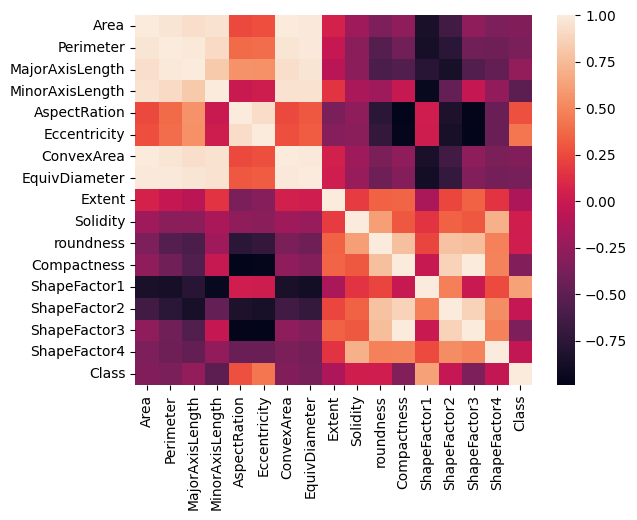

In [4]:
import seaborn as sns
corr = df.corr()
sns.heatmap(corr)

In [5]:
X = df.drop( ["Class"], axis=1)
y = df. filter( ["Class"], axis=1)
# y.head()
# y.describe()
X.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166


In [6]:
y.describe()

,Class
count,13611.000000
mean,4.631181
std,2.151782
min,1.000000
25%,3.000000
50%,5.000000
75%,7.000000
max,7.000000


In [7]:
s = StandardScaler()
X = s.fit_transform(X)
#y = s.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)
type(y_train)

pandas.core.frame.DataFrame

In [8]:
#logistic_regression = LogisticRegressionCV(penalty='11', Cs=10, random_state=0, n_jobs=-1)
logistic_regression = LogisticRegression(random_state = 0, multi_class ="multinomial")
model = logistic_regression.fit(X_train, y_train)
model.fit(X_train, y_train)


/home/harish/miniconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/harish/miniconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/harish/miniconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/harish/miniconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.

LogisticRegression(multi_class='multinomial', random_state=0)

In [9]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

In [10]:
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')

Accuracy: 0.9269188395152406
Precision: 0.9281837799613321
Recall: 0.9269188395152406


Cluster
4    3157
0    3111
6    2480
1    2033
3    1769
5     541
2     520
Name: count, dtype: int64
Cluster Centers:
[[-0.29372384 -0.2856068  -0.25566973 -0.2716939  -0.04699655  0.19044946
  -0.29540029 -0.26348755 -0.04266052  0.189593    0.16994668 -0.048173
   0.17016246 -0.05538314 -0.08138206  0.15061803  0.502837  ]
 [-0.46554671 -0.62237076 -0.83403282 -0.0204384  -1.40861595 -1.86462669
  -0.46980779 -0.49959738  0.47529812  0.69138478  1.23724808  1.61836996
  -0.18080097  1.44719575  1.68192113  0.74853883 -1.1455528 ]
 [ 4.11346767  3.41217353  3.19034289  3.83060726  0.01059567  0.21451488
   4.10507812  3.65259098  0.54796952 -0.04289891 -0.14760912 -0.11842367
  -2.7690751  -1.46417966 -0.14649743 -0.73036081 -0.59608953]
 [ 0.0214399   0.30154739  0.62480115 -0.42004574  1.85284701  1.29465956
   0.02061022  0.13105397 -0.95288126 -0.03891602 -1.32285122 -1.63830016
   0.40813489 -1.14110547 -1.56467604 -0.33904114 -1.69501607]
 [-0.73345798 -0.92010578 -0.89724752

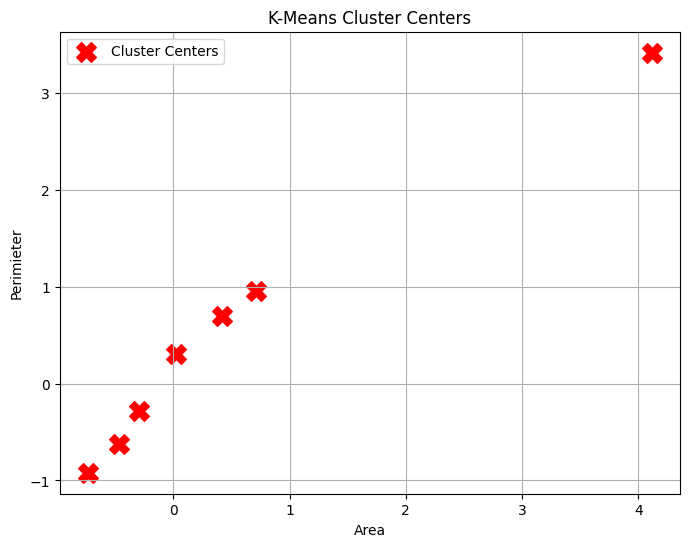

In [13]:
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from scipy.stats import mode
import matplotlib.pyplot as plt

# Drop the target variable (Class) for unsupervised learning
X = df.drop(["Class"], axis=1)

# Map the true labels with error handling for missing data
true_labels = df["Class"].map({
    "SEKER": 1, "BARBUNYA": 2, "BOMBAY": 3, "CALI": 4, 
    "HOROZ": 5, "SIRA": 6, "DERMASON": 7
})

# Handle NaNs if they exist in true_labels
true_labels = true_labels.dropna()

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-Means clustering
num_clusters = 7  # Assuming 7 clusters based on original class labels
kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
kmeans.fit(X_scaled)

# Get cluster labels
clusters = kmeans.labels_

# Add cluster labels to the dataframe
df["Cluster"] = clusters

# Display cluster distribution
print(df["Cluster"].value_counts())

# Display cluster centers
print("Cluster Centers:")
print(kmeans.cluster_centers_)

# Evaluate the model using accuracy (mapping clusters to actual classes)
def cluster_accuracy(true_labels, cluster_labels):
    labels_map = {}
    for i in range(num_clusters):
        mask = (cluster_labels == i)
        if np.sum(mask) > 0:
            labels_map[i] = mode(true_labels[mask]).mode[0]  # Get the most frequent class in the cluster
    predicted_labels = np.array([labels_map[label] for label in cluster_labels])
    return accuracy_score(true_labels, predicted_labels)

# Make sure both true_labels and clusters have the same length
if len(true_labels) == len(clusters):
    accuracy = cluster_accuracy(true_labels.values, clusters)
    print(f"Clustering Accuracy: {accuracy:.2f}")
else:
    print("Length mismatch between true labels and clusters")

# Plot the cluster centers
plt.figure(figsize=(8, 6))
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            c='red', s=200, marker='X', label='Cluster Centers')
plt.title("K-Means Cluster Centers")
plt.xlabel("Area")
plt.ylabel("Perimieter")
plt.legend()
plt.grid(True)
plt.show()


In [14]:
df.shape

(13611, 18)